## Implications of online daily health checkup in medical school in the COVID-19 epidemic

#### <div style="text-align: right;">Hiroaki Murayama 11/04/2022</div>

Using a simple stochastic branching process, we quantify the effectiveness of online daily health checkup. Given that reproduction number $R$ and dispersion parameter $k$, we assume the offspring distribution follows a negative binomial distribution as:
\begin{equation}
f(x;R,k)=\displaystyle\binom{x+k-1}{x}\left(\frac{R}{R+k}\right)^x\left(\frac{k}{R+k}\right)^k
\end{equation}
In the case that $k<1$, the secondary transmission is highly dispersed with the expected secondary cases $\mathbb{E}[x]=R$. In this setting, given the primary case (generation 0), let the reporting probability, i.e., ascertainment rate, through ODHC, $\alpha$. The determinants of reporting probability can be disentangled into two: transmission profile and adherence. As for the transmission profile, the types of transmission should be considered with asymptomatic/presymptomatic/symptomatic transmission. Potential symptomatic transmission can only be self-reported and ascertained. We also need to take into account the adherence proportion, on top of the different transmission profiles. Students may neglect their abnormal physical conditions. Then we modelled $\alpha$ as below.
\begin{equation}
\begin{split}
&\alpha =\beta\gamma\\
&\gamma\sim\mathrm{Beta}(100\mathbb{E}[\gamma],100-100\mathbb{E}[\gamma])
\end{split}
\end{equation}
where $\beta$ represents the rate that students who suffer from abnormal health conditions report their health conditions properly. $\gamma$ shows the temporal symptomatic rate of the potential primary case following a beta distribution to account for the substantial individual-level variations. The probability of causing a cluster $p(x)$ is then constructed as:
\begin{equation}
p(x)=1-f(x=0;R,k)-\alpha\sum_{x=1}^{\infty}f(x;R,k)=1-\left(\frac{k}{R+k}\right)^k-\alpha\left(1-\left(\frac{k}{R+k}\right)^k\right)
\end{equation}
This probability of having a cluster can be understood as the potential risk of having a cluster in school in the presence of an index case. Here we implicitly assume that the potential exposure by an index case occurs while some of the exposure and risk can be averted with ascertainment of a primary case as well as they contact with each other in the manner of homogeneous mixing. Then the effectiveness of ODHC ($1-RR$) and attributable fraction are calculated as:
\begin{equation}
\begin{split}
&DE_{G_0=1}=1-RR_{G_0=1}=\frac{p_{self}(x)-p_{ODHC}(x)}{p_{self}(x)}\\
&AR_{G_0=1}=p_{ODHC}(x)-p_{self}(x)
\end{split}
\end{equation}
In this case, the effectiveness of ODHC is interpreted as direct effect.
Using the simple branching process model, we simulate $p(x)$, $DE$, and $AR$ for the different combinations of $R$, $k$, and $\beta$ so that the present study would guide better-understanding of how much ODHC is helpful to reduce the risk of secondary transmission in school.
Using the simple branching process model, we simulated $p_x$, $DE_{G_0=1}$, and $AF_{G_0=1}$ for the different combinations of $R$, $k$, $\beta_{self}$, and $\beta_{ODHC}$ so that the present study would guide better-understanding of how much ODHC is helpful to reduce the risk of secondary transmission in school. Here we set three scenarios: the adherence proportion not to go to school with symptoms $\beta_{ODHC}$ is (i) $\beta_{ODHC}=1$, (ii) $\beta_{ODHC}=0.9$, and (iii) $\beta_{ODHC}=0.8$ while $R$, $k$, and the expected value of symptomatic transmission $\mathbb{E}[\gamma]$ are fixed to be 2.5, 0.10, and 0.41, respectively. We sampled the temporal proportion of potential symptomatic transmission out of the beta distribution with 10,000 iterations and calculated each parameter with $\beta_{self}=\{0,0.1,0.2,…,\beta_{ODHC}\}$.
We also conducted sensitivity analysis corresponding to the expected value of secondary transmission $R$ and the dispersion parameter $k$ to check the robustness of the model. As for $R$, it is set to be 1.5 and 2.0. The dispersion parameter $k$ is set to 0.3 and 0.5 to keep the overdispersed transmission.


In [2]:
rm(list=ls())
libraries = c("dplyr","magrittr","tidyr","reshape2","ggplot2","ggpubr","hrbrthemes","extrafont","openxlsx","readxl","RColorBrewer","zoo",
              "readxl","writexl","gridExtra","MASS","readr","stats","pracma","stringr","mixdist","corpcor")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE,quietly=TRUE) }

theme_set(theme_bw())
setwd("C:/Users/USER/Documents/GitHub/COVID19_odhc_2022/COVID19_odhc_2022")

In [3]:
getwd()

[1] "C:/Users/USER/Documents/GitHub/COVID19_odhc_2022/COVID19_odhc_2022"

In [5]:
source("src/basicfunction.R") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

2.5%       50%     97.5% 
0.1511841 0.1755885 0.1986392

2.5%       50%     97.5% 
0.1652812 0.1869739 0.2074635

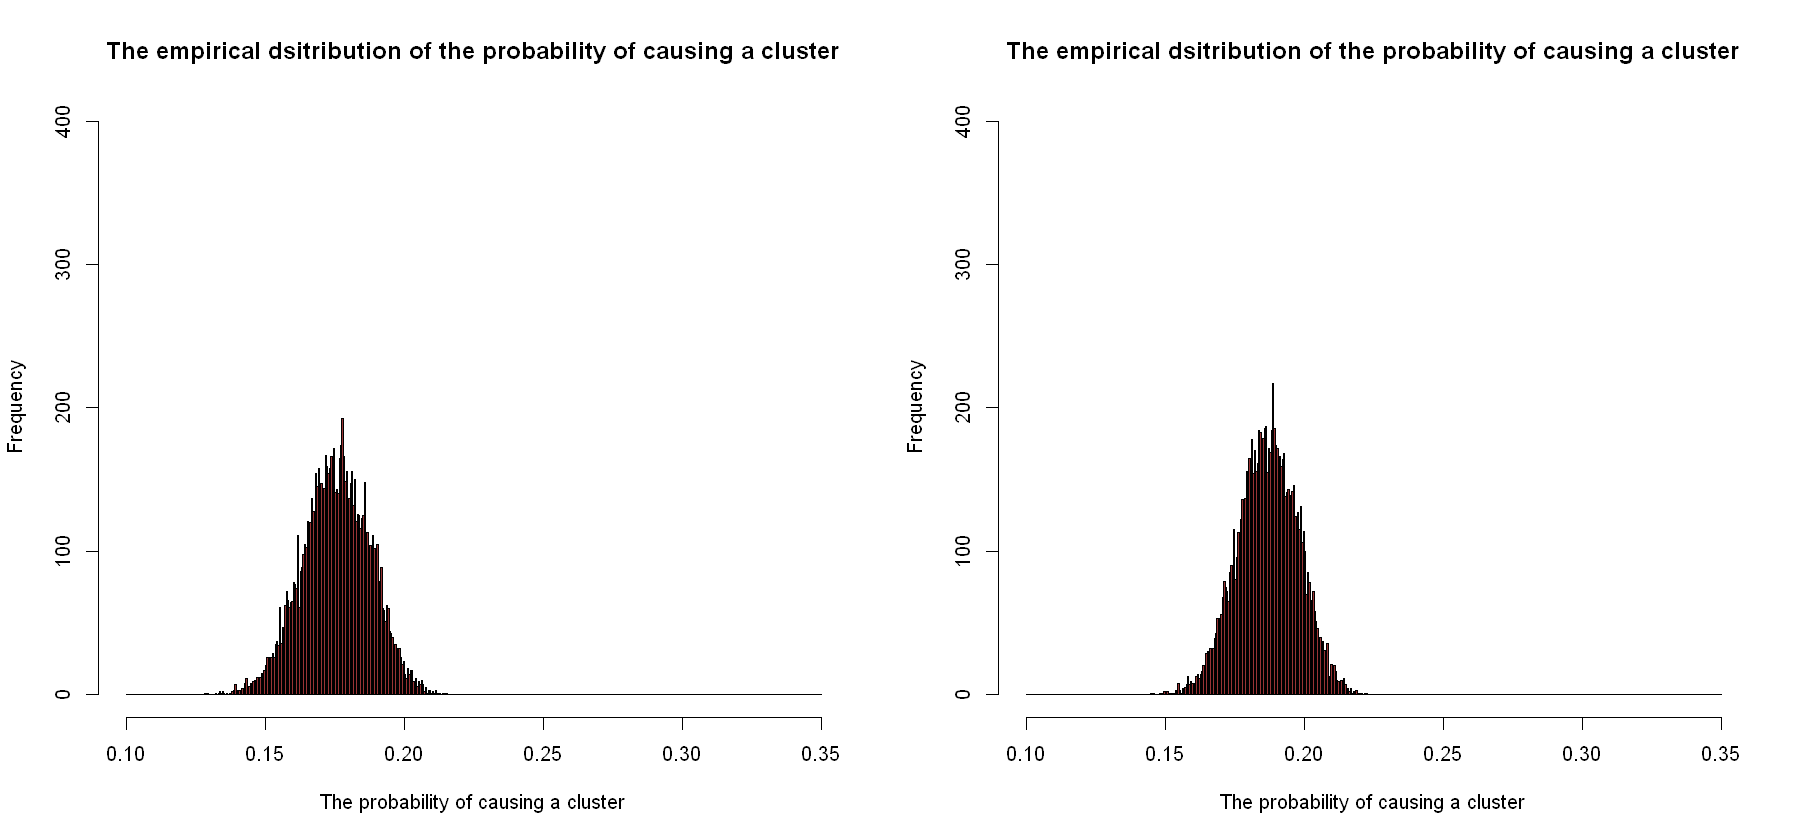

In [6]:
prob_cluster_odhc<- p(R=2.5,k=0.1,beta=0.9,Egamma=0.41)
prob_cluster_self<- p(R=2.5,k=0.1,beta=0.8,Egamma=0.41)
quantile(prob_cluster_odhc,probs=c(.025,.50,.975));quantile(prob_cluster_self,probs=c(.025,.50,.975)) 
options(repr.plot.width=15,repr.plot.height=7)
par(mfrow=c(1,2))
hist(prob_cluster_odhc, breaks=seq(0.1,0.35,0.0005), main="The empirical dsitribution of the probability of causing a cluster", xlab="The probability of causing a cluster", ylim=c(0,400), col="#993435")
hist(prob_cluster_self, breaks=seq(0.1,0.35,0.0005), main="The empirical dsitribution of the probability of causing a cluster", xlab="The probability of causing a cluster", ylim=c(0,400), col="#993435")

In [7]:
de(2.5,0.1,0.9,0.8,0.41) %>% quantile(probs=c(.025,.50,.975))
ar(2.5,0.1,0.9,0.8,0.41) %>% quantile(probs=c(.025,.50,.975))

2.5%        50%      97.5% 
0.04253396 0.06089320 0.08529122

2.5%          50%        97.5% 
-0.014097032 -0.011385439 -0.008824242

2.5%       50%     97.5% 
0.1511841 0.1755885 0.1986392

2.5%       50%     97.5% 
0.2075722 0.2211302 0.2339362

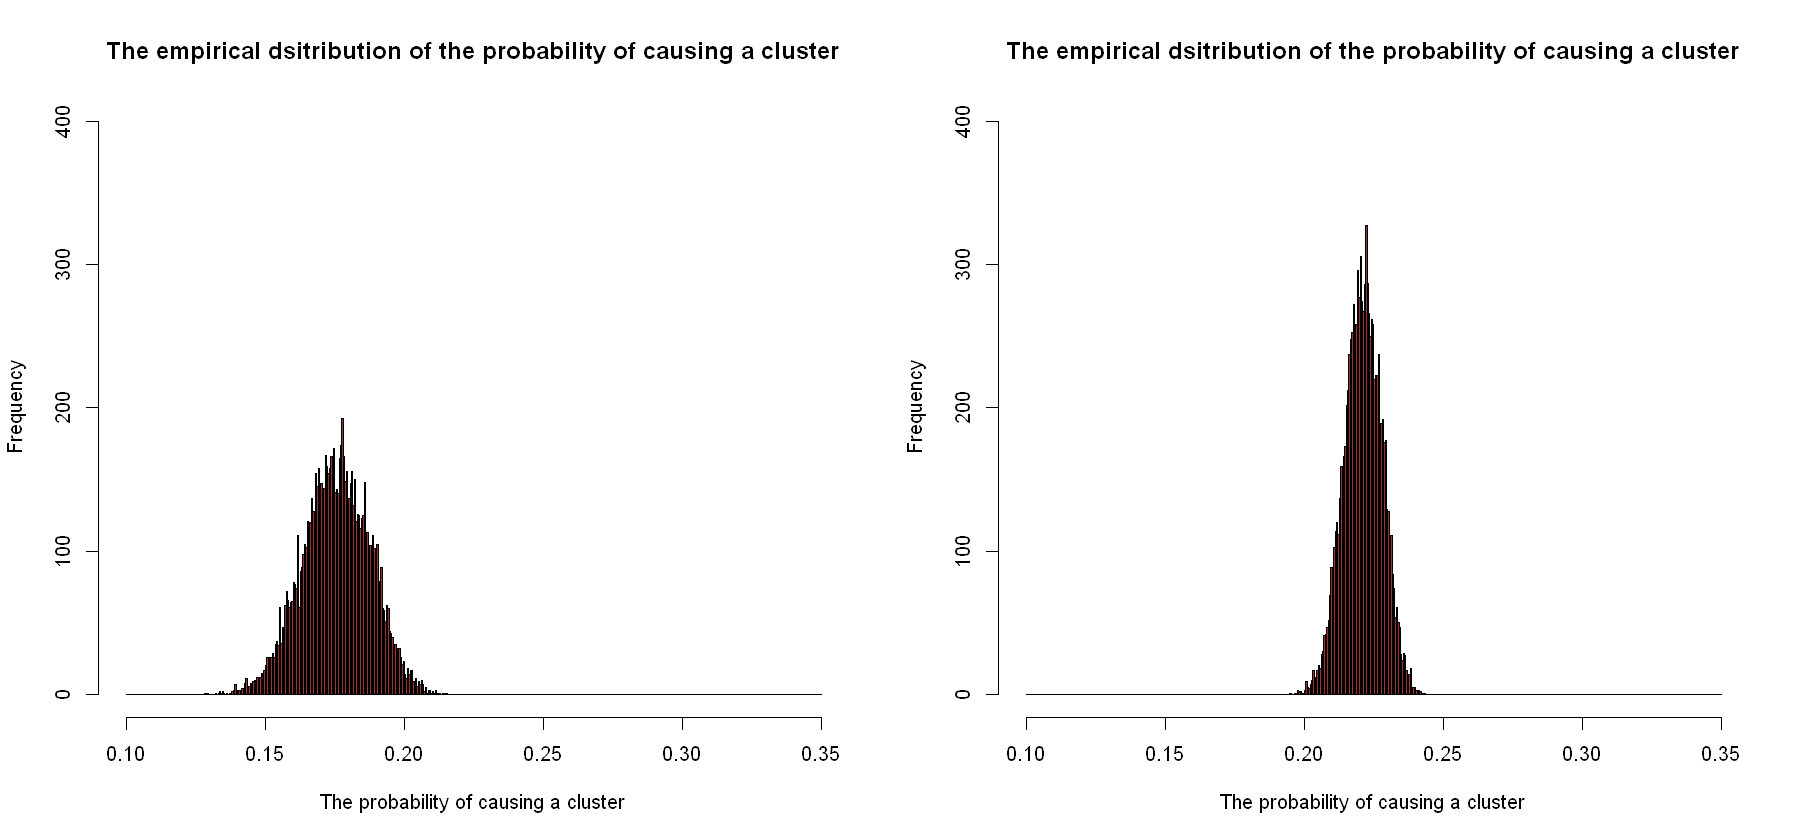

In [8]:
prob_cluster_odhc<- p(R=2.5,k=0.1,beta=0.9,Egamma=0.41)
prob_cluster_self<- p(R=2.5,k=0.1,beta=0.5,Egamma=0.41)
quantile(prob_cluster_odhc,probs=c(.025,.50,.975));quantile(prob_cluster_self,probs=c(.025,.50,.975)) 
options(repr.plot.width=15,repr.plot.height=7)
par(mfrow=c(1,2))
hist(prob_cluster_odhc, breaks=seq(0.1,0.35,0.0005), main="The empirical dsitribution of the probability of causing a cluster", xlab="The probability of causing a cluster", ylim=c(0,400), col="#993435")
hist(prob_cluster_self, breaks=seq(0.1,0.35,0.0005), main="The empirical dsitribution of the probability of causing a cluster", xlab="The probability of causing a cluster", ylim=c(0,400), col="#993435")

In [9]:
de(2.5,0.1,0.9,0.5,0.41) %>% quantile(probs=c(.025,.50,.975))
ar(2.5,0.1,0.9,0.5,0.41) %>% quantile(probs=c(.025,.50,.975))

2.5%       50%     97.5% 
0.1508829 0.2059500 0.2716554

2.5%         50%       97.5% 
-0.05638813 -0.04554176 -0.03529697

### Scenario 1: R=2.5, k=0.1

In [11]:
beta_odhc_s11 <- 1
beta_self <- seq(0,beta_odhc_s11,0.1)
de_s11 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s11 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s11[i,] <- de(R=2.5,k=0.1,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s11[i,] <- ar(R=2.5,k=0.1,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s11 %<>% cbind(beta_self) %>% as.data.frame()
ar_s11 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s11) <- c("lower","median","upper","beta_self")
colnames(ar_s11) <- c("lower","median","upper","beta_self")

In [12]:
beta_odhc_s12 <- 0.9
beta_self <- seq(0,beta_odhc_s12,0.1)
de_s12 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s12 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s12[i,] <- de(R=2.5,k=0.1,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s12[i,] <- ar(R=2.5,k=0.1,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s12 %<>% cbind(beta_self) %>% as.data.frame()
ar_s12 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s12) <- c("lower","median","upper","beta_self")
colnames(ar_s12) <- c("lower","median","upper","beta_self")

In [13]:
beta_odhc_s13 <- 0.8
beta_self <- seq(0,beta_odhc_s13,0.1)
de_s13 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s13 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s13[i,] <- de(R=2.5,k=0.1,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s13[i,] <- ar(R=2.5,k=0.1,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s13 %<>% cbind(beta_self) %>% as.data.frame()
ar_s13 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s13) <- c("lower","median","upper","beta_self")
colnames(ar_s13) <- c("lower","median","upper","beta_self")

In [14]:
de_s11[1,];de_s12[1,];de_s13[1,]

,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3173532,0.4094636,0.5069828,0


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2856179,0.3685173,0.4562845,0


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2538826,0.3275709,0.4055862,0


In [15]:
de_s11[10,];de_s12[9,];de_s13[8,]

,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
10,0.04442346,0.06484162,0.09324413,0.9


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
9,0.04253396,0.0608932,0.08529122,0.8


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
8,0.04079863,0.05739805,0.07858833,0.7


In [16]:
ar_s11[1,];ar_s12[1,];ar_s13[1,]

,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1409703,-0.1138544,-0.08824242,0


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1268733,-0.102469,-0.07941818,0


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1127763,-0.09108351,-0.07059394,0


In [17]:
ar_s11[10,];ar_s12[9,];ar_s13[8,]

,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
10,-0.01409703,-0.01138544,-0.008824242,0.9


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
9,-0.01409703,-0.01138544,-0.008824242,0.8


,lower,median,upper,beta_self
,<dbl>,<dbl>,<dbl>,<dbl>
8,-0.01409703,-0.01138544,-0.008824242,0.7


### plot

In [18]:
de_s11_plot <- de_s11 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=0.9, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s11, 0.1), limits=c(0,beta_odhc_s11)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s12_plot <- de_s12 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=0.9, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s12, 0.1), limits=c(0,beta_odhc_s12)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s13_plot <- de_s13 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=0.9, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s13, 0.1), limits=c(0,beta_odhc_s13)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

In [19]:
ar_s11_plot <- ar_s11 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=-0.2, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s11, 0.1), limits=c(0,beta_odhc_s11)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s12_plot <- ar_s12 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=-0.2, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s12, 0.1), limits=c(0,beta_odhc_s12)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s13_plot <- ar_s13 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=-0.2, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s13, 0.1), limits=c(0,beta_odhc_s13)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

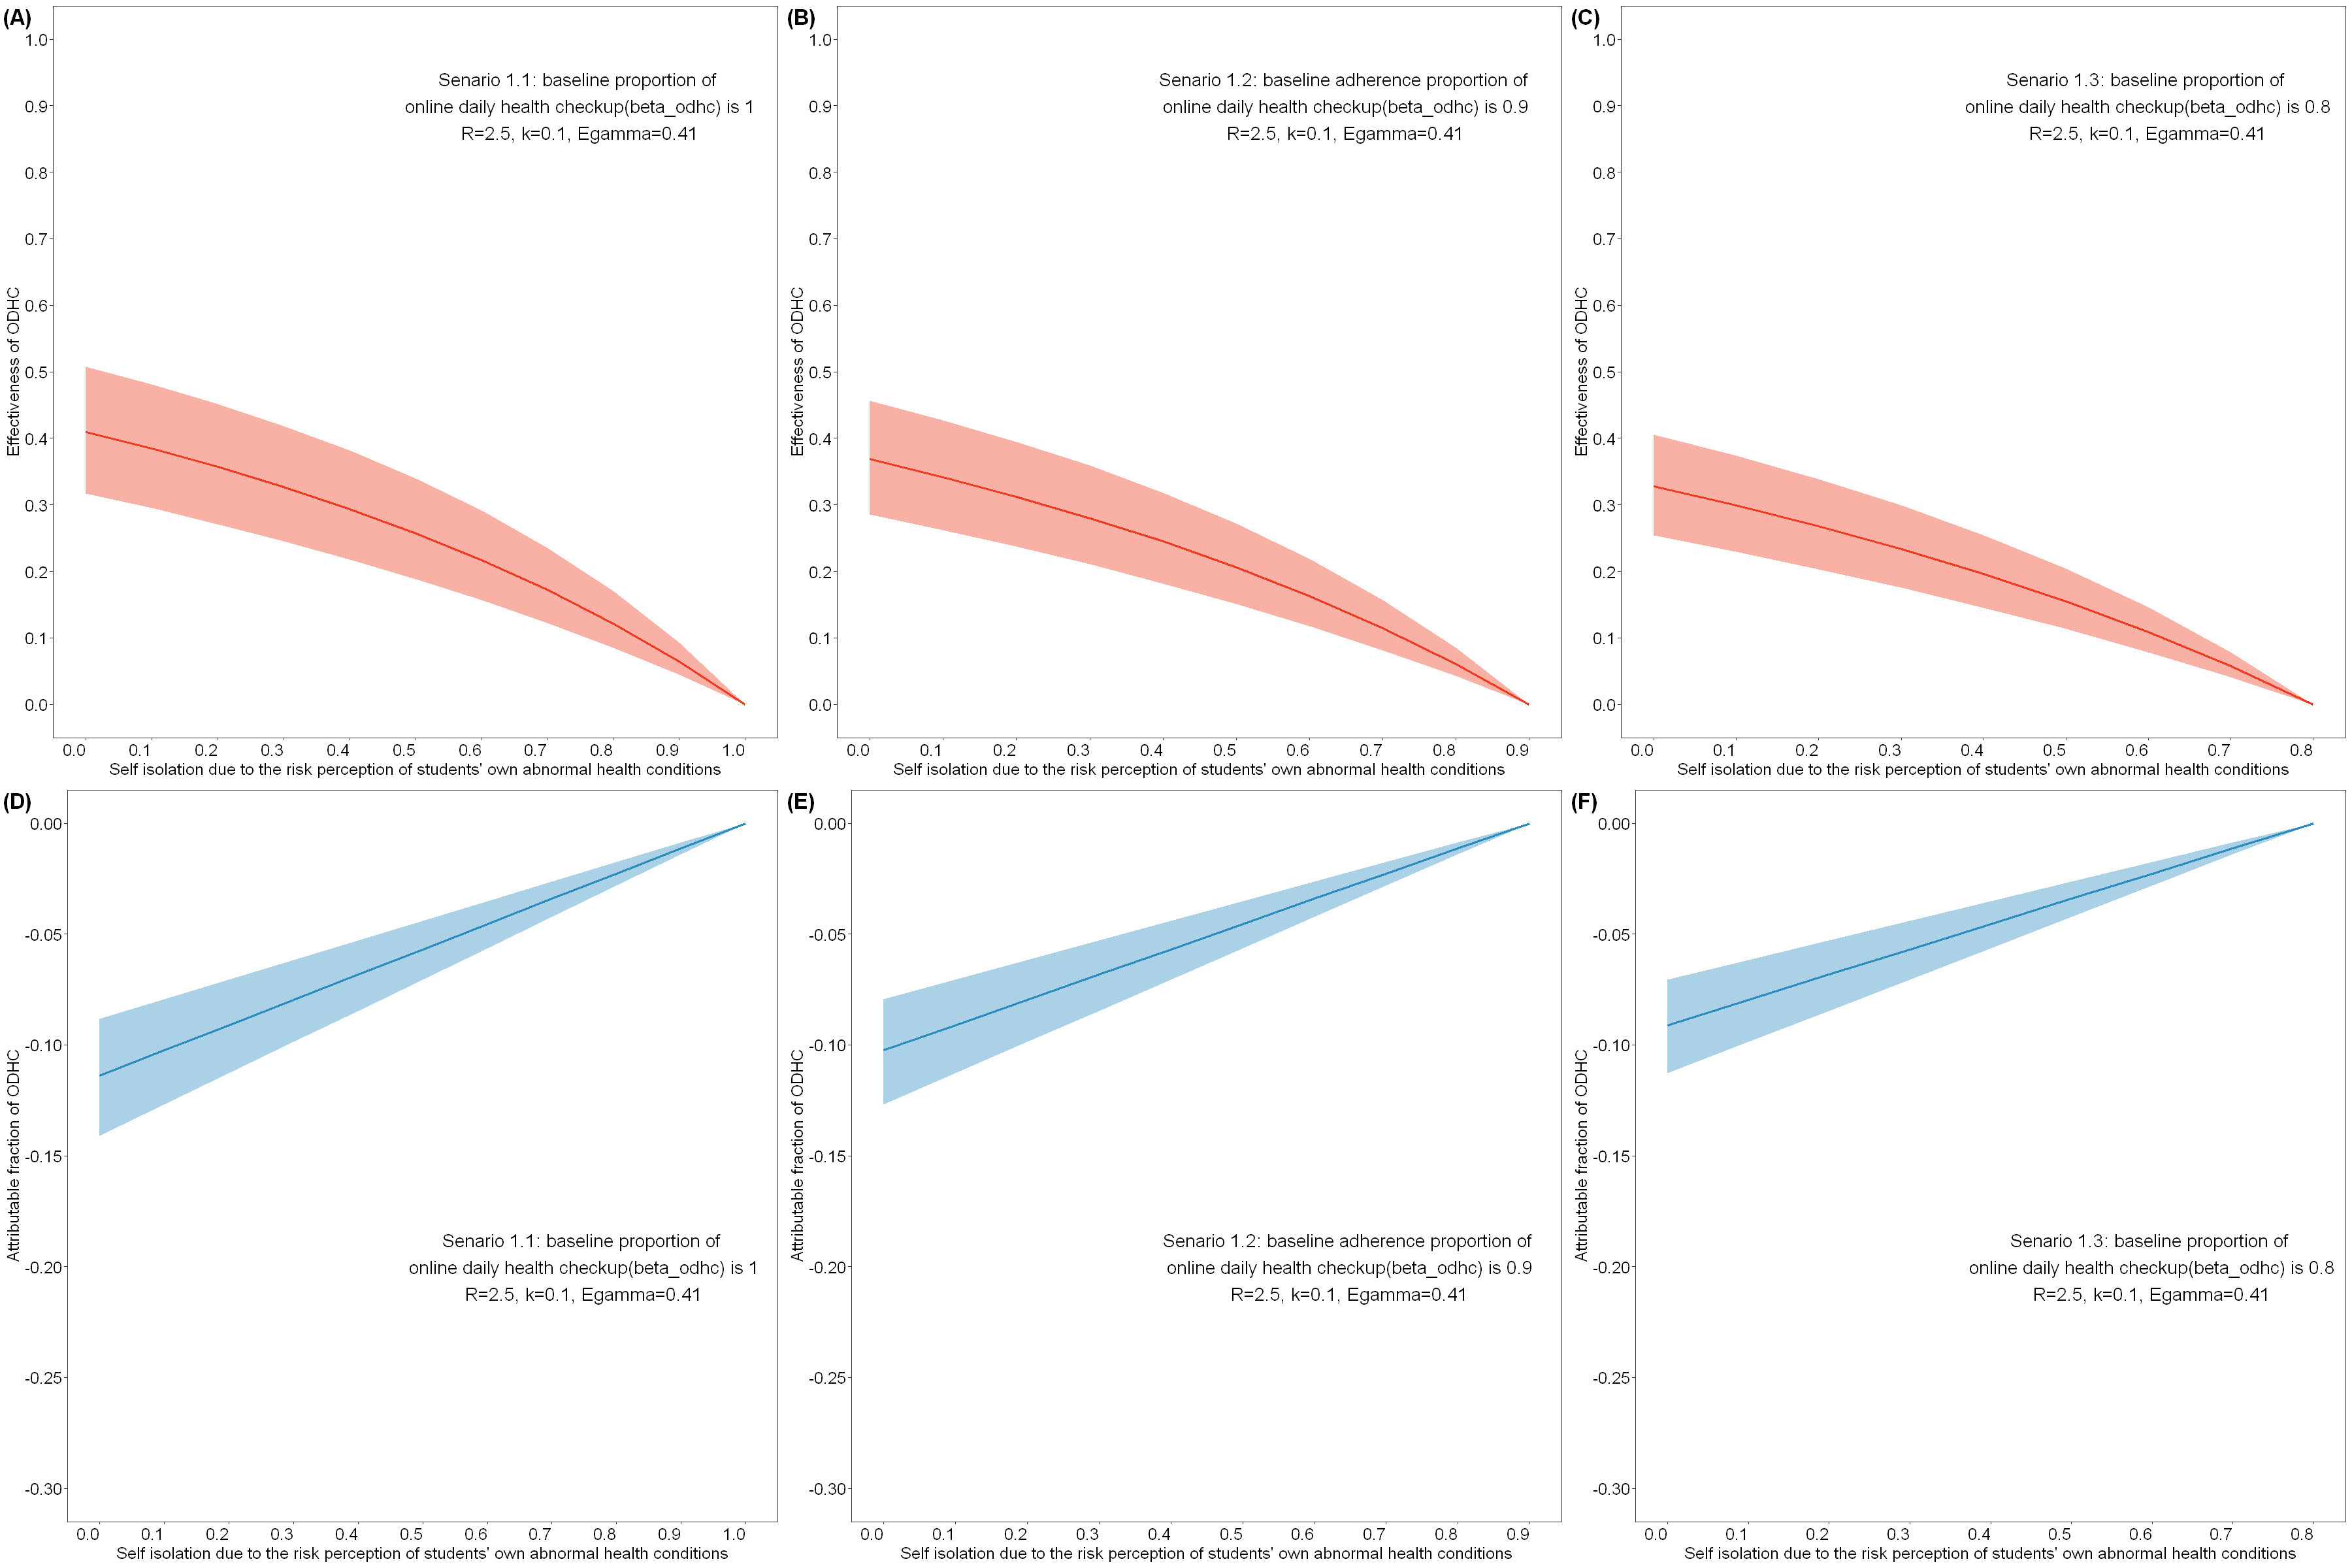

In [20]:
options(repr.plot.width=30,repr.plot.height=20)
ggarrange(de_s11_plot,de_s12_plot,de_s13_plot,ar_s11_plot,ar_s12_plot,ar_s13_plot, nrow=2,ncol=3,font.label=list(size=20),hjust=-0.1,labels=c("(A)","(B)","(C)","(D)","(E)","(F)"),common.legend=TRUE,legend="right")

ggsave(file = "output/baseline_1.png", width = 30, height = 20)

### Scenario 2: R=2.0, k=0.1

In [21]:
beta_odhc_s21 <- 1
beta_self <- seq(0,beta_odhc_s21,0.1)
de_s21 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s21 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s21[i,] <- de(R=2,k=0.1,beta_odhc=beta_odhc_s21,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s21[i,] <- ar(R=2,k=0.1,beta_odhc=beta_odhc_s21,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s21 %<>% cbind(beta_self) %>% as.data.frame()
ar_s21 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s21) <- c("lower","median","upper","beta_self")
colnames(ar_s21) <- c("lower","median","upper","beta_self")

In [22]:
beta_odhc_s22 <- 0.9
beta_self <- seq(0,beta_odhc_s22,0.1)
de_s22 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s22 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s22[i,] <- de(R=2,k=0.1,beta_odhc=beta_odhc_s22,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s22[i,] <- ar(R=2,k=0.1,beta_odhc=beta_odhc_s22,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s22 %<>% cbind(beta_self) %>% as.data.frame()
ar_s22 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s22) <- c("lower","median","upper","beta_self")
colnames(ar_s22) <- c("lower","median","upper","beta_self")

In [23]:
beta_odhc_s23 <- 0.8
beta_self <- seq(0,beta_odhc_s23,0.1)
de_s23 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s23 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s23[i,] <- de(R=2,k=0.1,beta_odhc=beta_odhc_s23,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s23[i,] <- ar(R=2,k=0.1,beta_odhc=beta_odhc_s23,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s23 %<>% cbind(beta_self) %>% as.data.frame()
ar_s23 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s23) <- c("lower","median","upper","beta_self")
colnames(ar_s23) <- c("lower","median","upper","beta_self")

### plot

In [24]:
de_s21_plot <- de_s21 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=0.9, size=6, label="Senario 2.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s21, 0.1), limits=c(0,beta_odhc_s21)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s22_plot <- de_s22 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=0.9, size=6, label="Senario 2.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s22, 0.1), limits=c(0,beta_odhc_s22)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s23_plot <- de_s23 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=0.9, size=6, label="Senario 2.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s23, 0.1), limits=c(0,beta_odhc_s23)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

In [25]:
ar_s21_plot <- ar_s21 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=-0.2, size=6, label="Senario 2.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s21, 0.1), limits=c(0,beta_odhc_s21)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s22_plot <- ar_s22 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=-0.2, size=6, label="Senario 2.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s22, 0.1), limits=c(0,beta_odhc_s22)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s23_plot <- ar_s23 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=-0.2, size=6, label="Senario 2.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s23, 0.1), limits=c(0,beta_odhc_s23)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

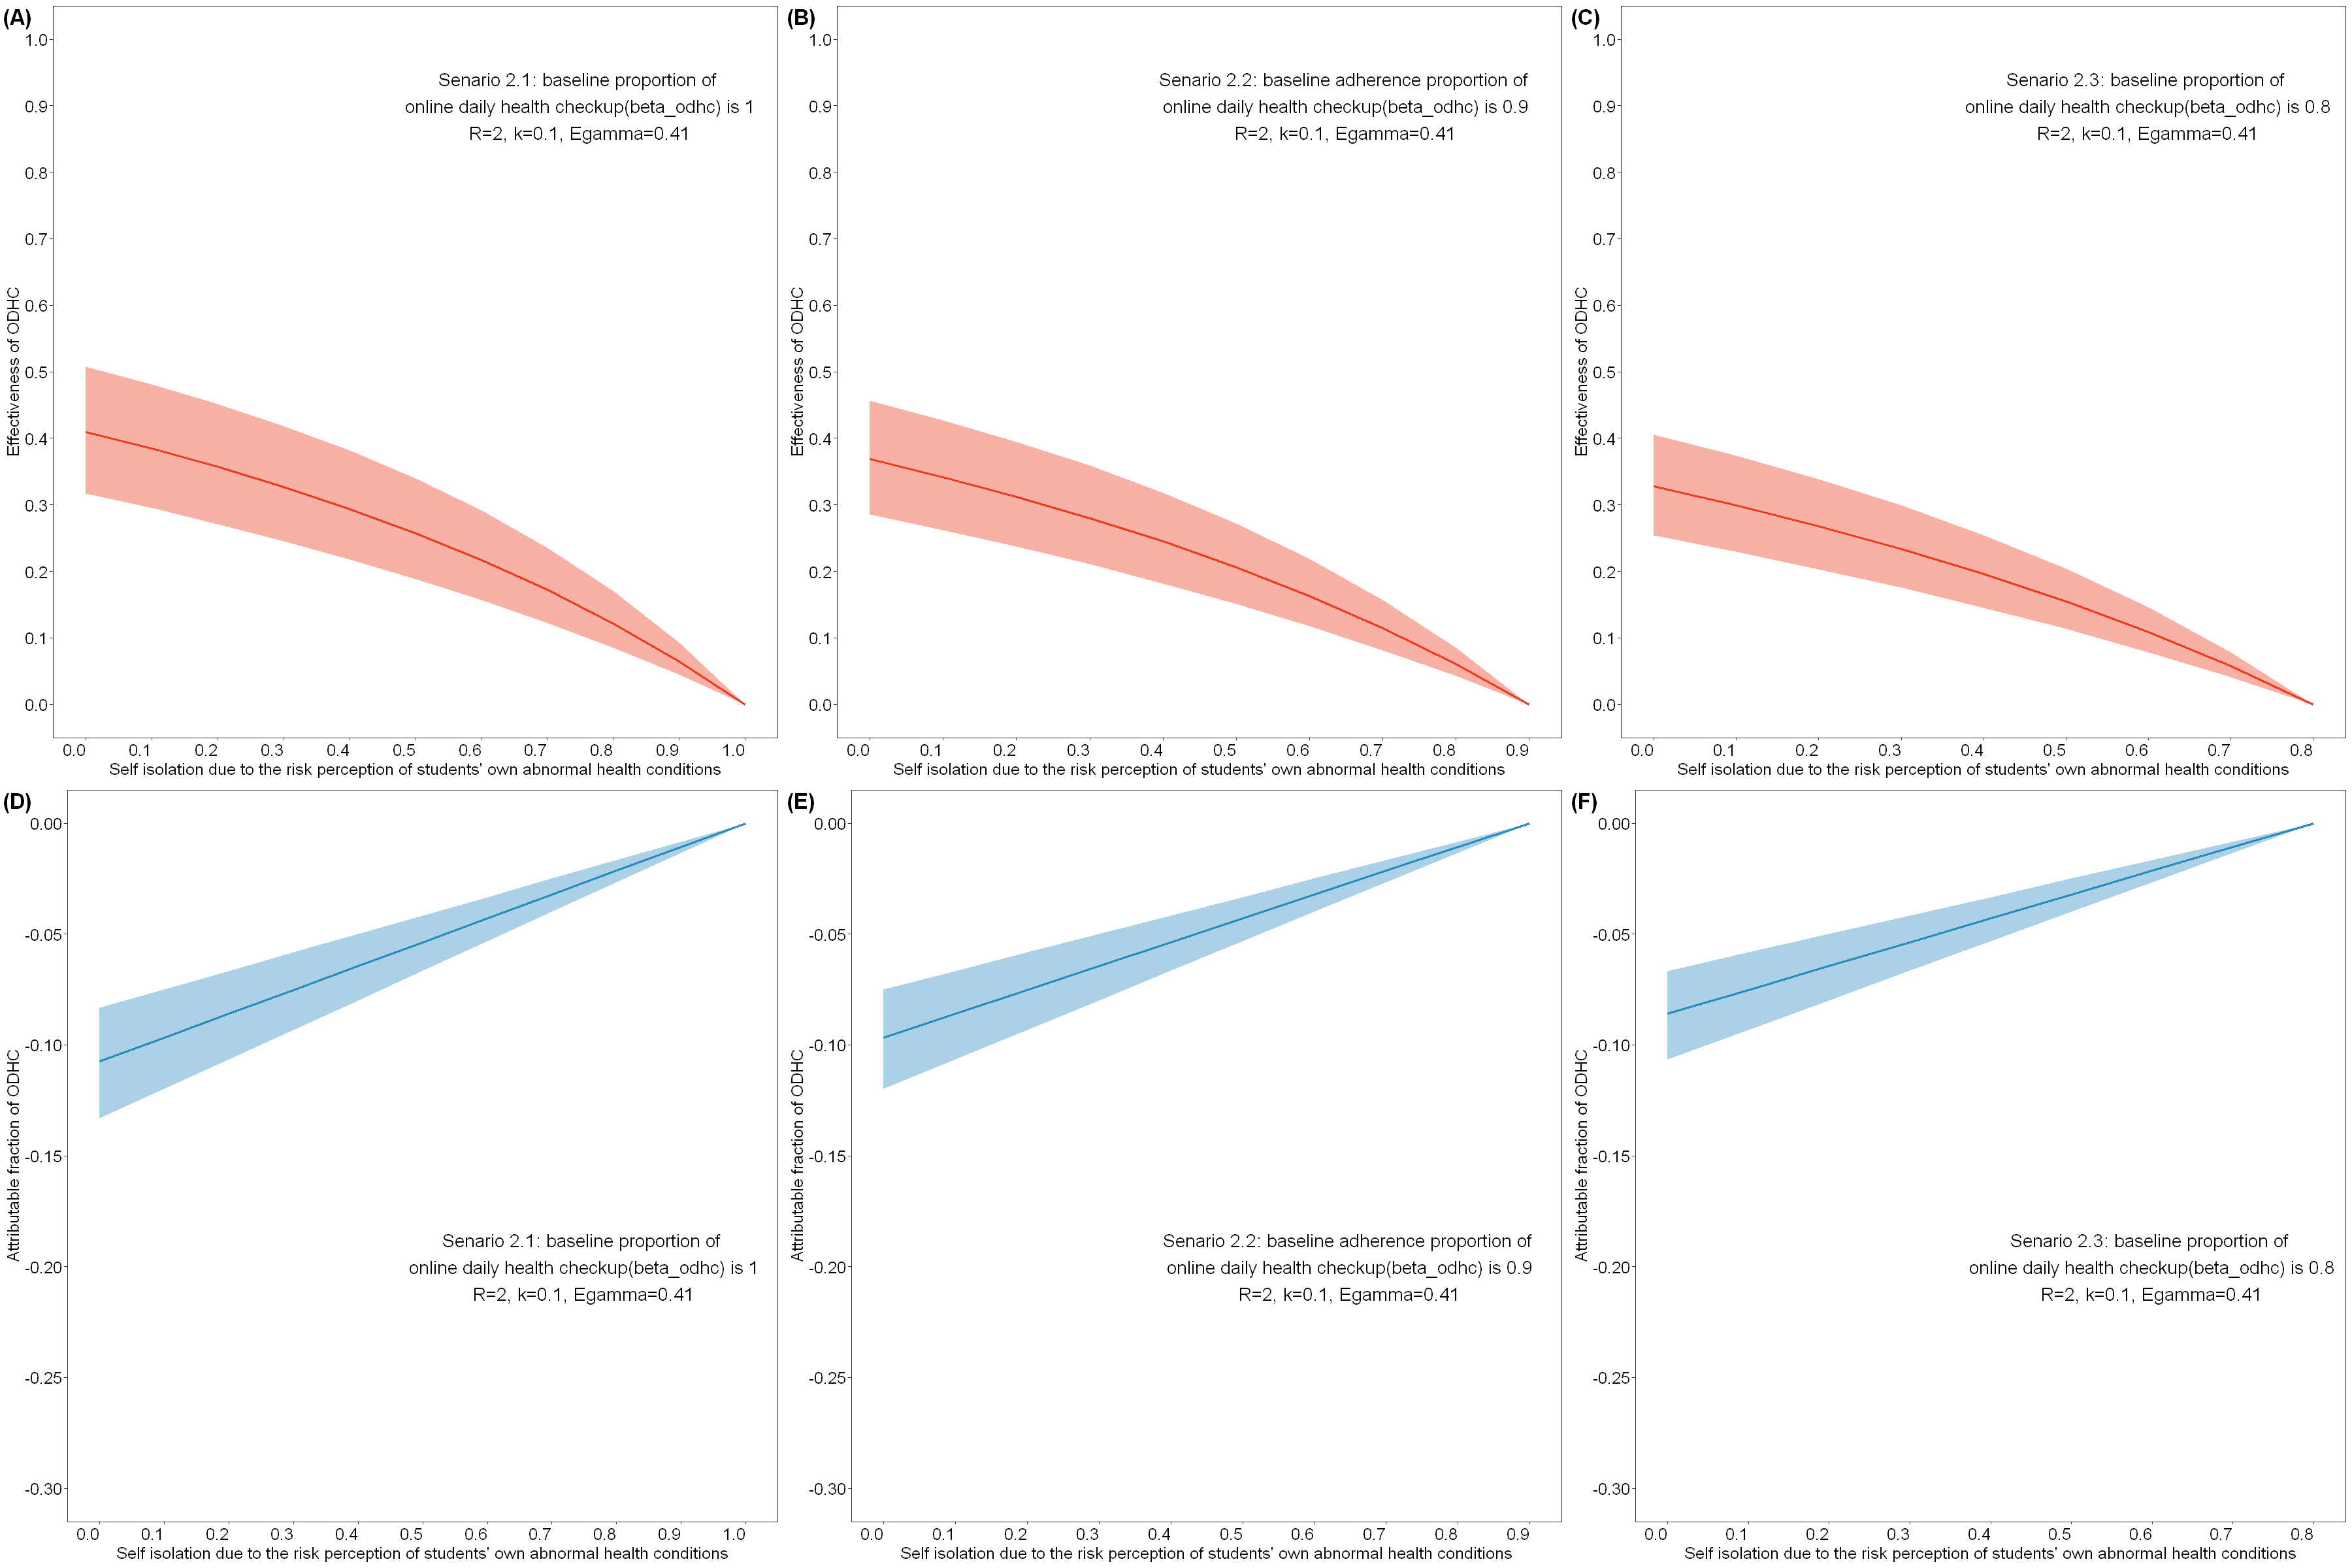

In [26]:
options(repr.plot.width=30,repr.plot.height=20)
ggarrange(de_s21_plot,de_s22_plot,de_s23_plot,ar_s21_plot,ar_s22_plot,ar_s23_plot, nrow=2,ncol=3,font.label=list(size=20),hjust=-0.1,labels=c("(A)","(B)","(C)","(D)","(E)","(F)"),common.legend=TRUE,legend="right")

ggsave(file = "output/baseline_2.png", width = 30, height = 20)

### Scenario 3: R=1.5, k=0.1

In [27]:
beta_odhc_s31 <- 1
beta_self <- seq(0,beta_odhc_s11,0.1)
de_s31 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s31 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s31[i,] <- de(R=1.5,k=0.1,beta_odhc=beta_odhc_s31,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s31[i,] <- ar(R=1.5,k=0.1,beta_odhc=beta_odhc_s31,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s31 %<>% cbind(beta_self) %>% as.data.frame()
ar_s31 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s31) <- c("lower","median","upper","beta_self")
colnames(ar_s31) <- c("lower","median","upper","beta_self")

In [28]:
beta_odhc_s32 <- 0.9
beta_self <- seq(0,beta_odhc_s32,0.1)
de_s32 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s32 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s32[i,] <- de(R=1.5,k=0.1,beta_odhc=beta_odhc_s32,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s32[i,] <- ar(R=1.5,k=0.1,beta_odhc=beta_odhc_s32,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s32 %<>% cbind(beta_self) %>% as.data.frame()
ar_s32 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s32) <- c("lower","median","upper","beta_self")
colnames(ar_s32) <- c("lower","median","upper","beta_self")

In [29]:
beta_odhc_s33 <- 0.8
beta_self <- seq(0,beta_odhc_s33,0.1)
de_s33 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s33 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s33[i,] <- de(R=2,k=0.1,beta_odhc=beta_odhc_s33,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s33[i,] <- ar(R=2,k=0.1,beta_odhc=beta_odhc_s33,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s33 %<>% cbind(beta_self) %>% as.data.frame()
ar_s33 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s33) <- c("lower","median","upper","beta_self")
colnames(ar_s33) <- c("lower","median","upper","beta_self")

### plot

In [30]:
de_s31_plot <- de_s31 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=0.9, size=6, label="Senario 2.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s31, 0.1), limits=c(0,beta_odhc_s31)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s32_plot <- de_s32 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=0.9, size=6, label="Senario 2.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s32, 0.1), limits=c(0,beta_odhc_s32)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s33_plot <- de_s33 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=0.9, size=6, label="Senario 2.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s33, 0.1), limits=c(0,beta_odhc_s33)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

In [31]:
ar_s31_plot <- ar_s31 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=-0.2, size=6, label="Senario 2.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s31, 0.1), limits=c(0,beta_odhc_s31)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s32_plot <- ar_s32 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=-0.2, size=6, label="Senario 2.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s32, 0.1), limits=c(0,beta_odhc_s32)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s33_plot <- ar_s33 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=-0.2, size=6, label="Senario 2.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=1.5, k=0.1, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s33, 0.1), limits=c(0,beta_odhc_s33)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

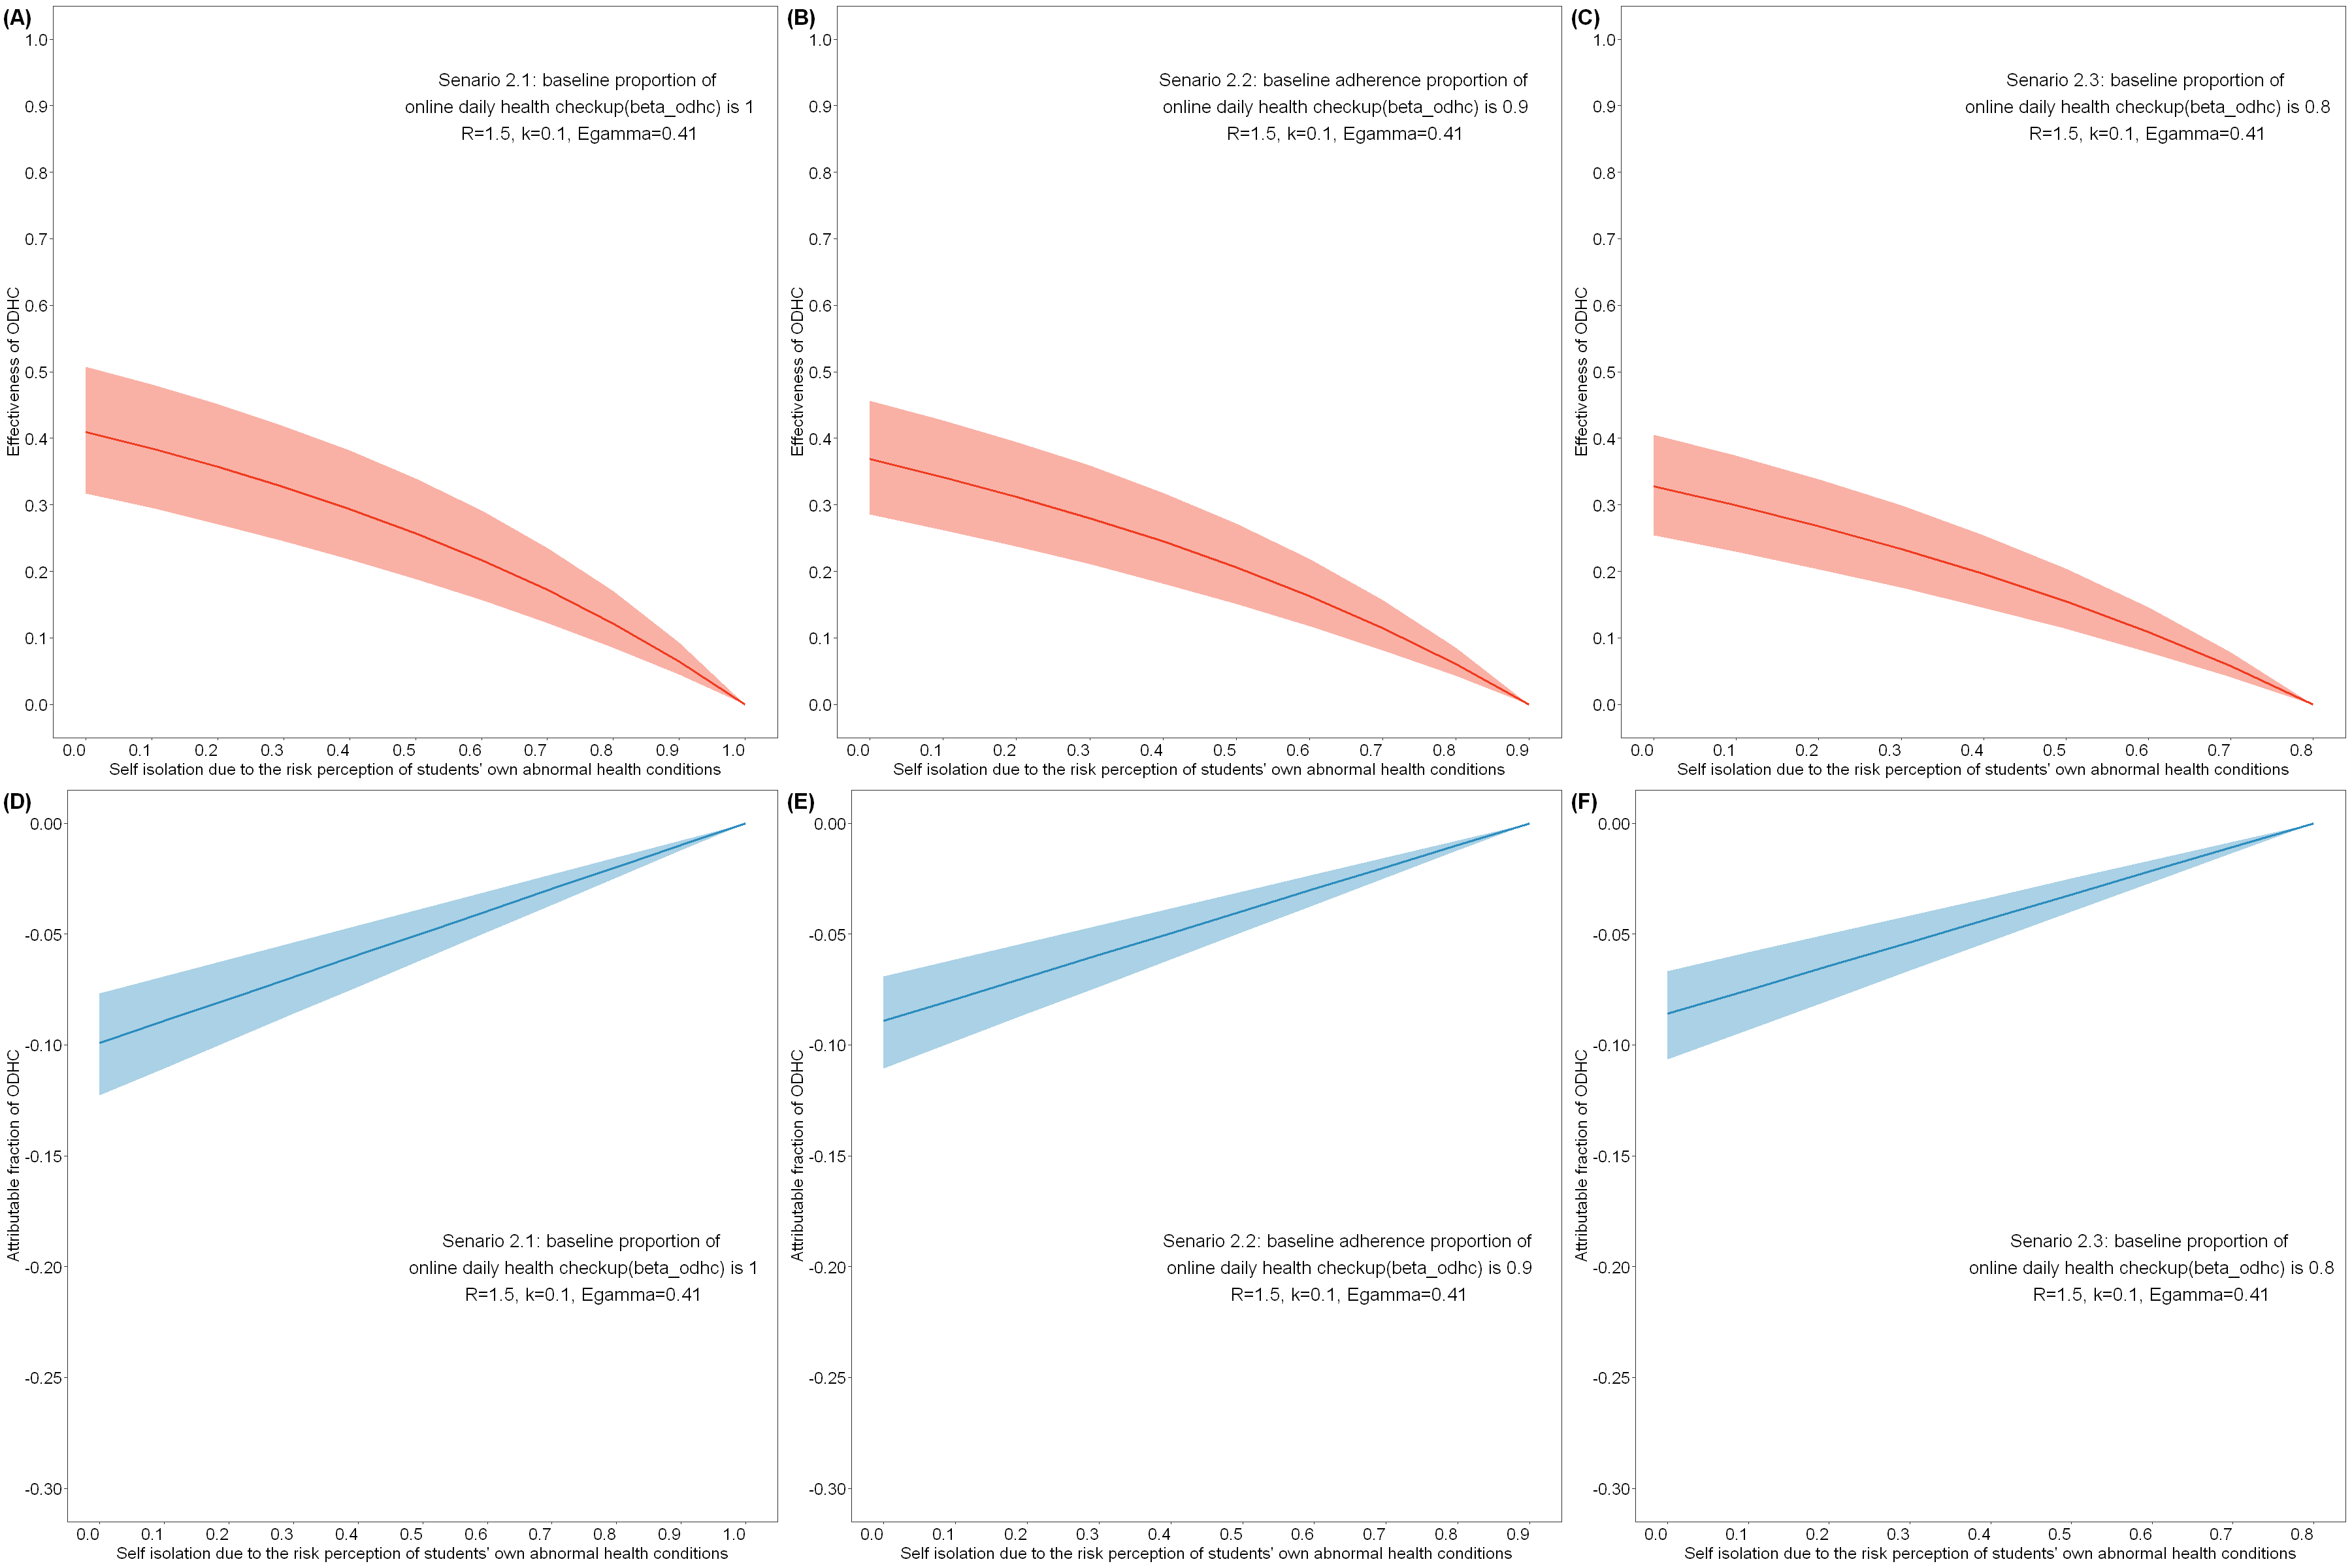

In [32]:
options(repr.plot.width=30,repr.plot.height=20)
ggarrange(de_s31_plot,de_s32_plot,de_s33_plot,ar_s31_plot,ar_s32_plot,ar_s33_plot, nrow=2,ncol=3,font.label=list(size=20),hjust=-0.1,labels=c("(A)","(B)","(C)","(D)","(E)","(F)"),common.legend=TRUE,legend="right")

ggsave(file = "output/baseline_3.png", width = 30, height = 20)

### Scenario 4: R=2.5, k=0.3

In [33]:
beta_odhc_s41 <- 1
beta_self <- seq(0,beta_odhc_s41,0.1)
de_s41 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s41 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s41[i,] <- de(R=2.5,k=0.3,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s41[i,] <- ar(R=2.5,k=0.3,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s41 %<>% cbind(beta_self) %>% as.data.frame()
ar_s41 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s41) <- c("lower","median","upper","beta_self")
colnames(ar_s41) <- c("lower","median","upper","beta_self")

In [34]:
beta_odhc_s42 <- 0.9
beta_self <- seq(0,beta_odhc_s42,0.1)
de_s42 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s42 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s42[i,] <- de(R=2.5,k=0.3,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s42[i,] <- ar(R=2.5,k=0.3,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s42 %<>% cbind(beta_self) %>% as.data.frame()
ar_s42 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s42) <- c("lower","median","upper","beta_self")
colnames(ar_s42) <- c("lower","median","upper","beta_self")

In [35]:
beta_odhc_s43 <- 0.8
beta_self <- seq(0,beta_odhc_s43,0.1)
de_s43 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s43 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s43[i,] <- de(R=2.5,k=0.3,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s43[i,] <- ar(R=2.5,k=0.3,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s43 %<>% cbind(beta_self) %>% as.data.frame()
ar_s43 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s43) <- c("lower","median","upper","beta_self")
colnames(ar_s43) <- c("lower","median","upper","beta_self")

### plot

In [36]:
de_s41_plot <- de_s41 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=0.9, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s41, 0.1), limits=c(0,beta_odhc_s41)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s42_plot <- de_s42 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=0.9, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s42, 0.1), limits=c(0,beta_odhc_s42)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s43_plot <- de_s43 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=0.9, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s43, 0.1), limits=c(0,beta_odhc_s43)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

In [37]:
ar_s41_plot <- ar_s41 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=-0.2, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s41, 0.1), limits=c(0,beta_odhc_s41)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s42_plot <- ar_s42 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=-0.2, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s42, 0.1), limits=c(0,beta_odhc_s42)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

ar_s43_plot <- ar_s43 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=-0.2, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.3, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s43, 0.1), limits=c(0,beta_odhc_s43)) +
  scale_y_continuous(breaks = seq(-0.3, 0, 0.05), limits=c(-0.3, 0)) 

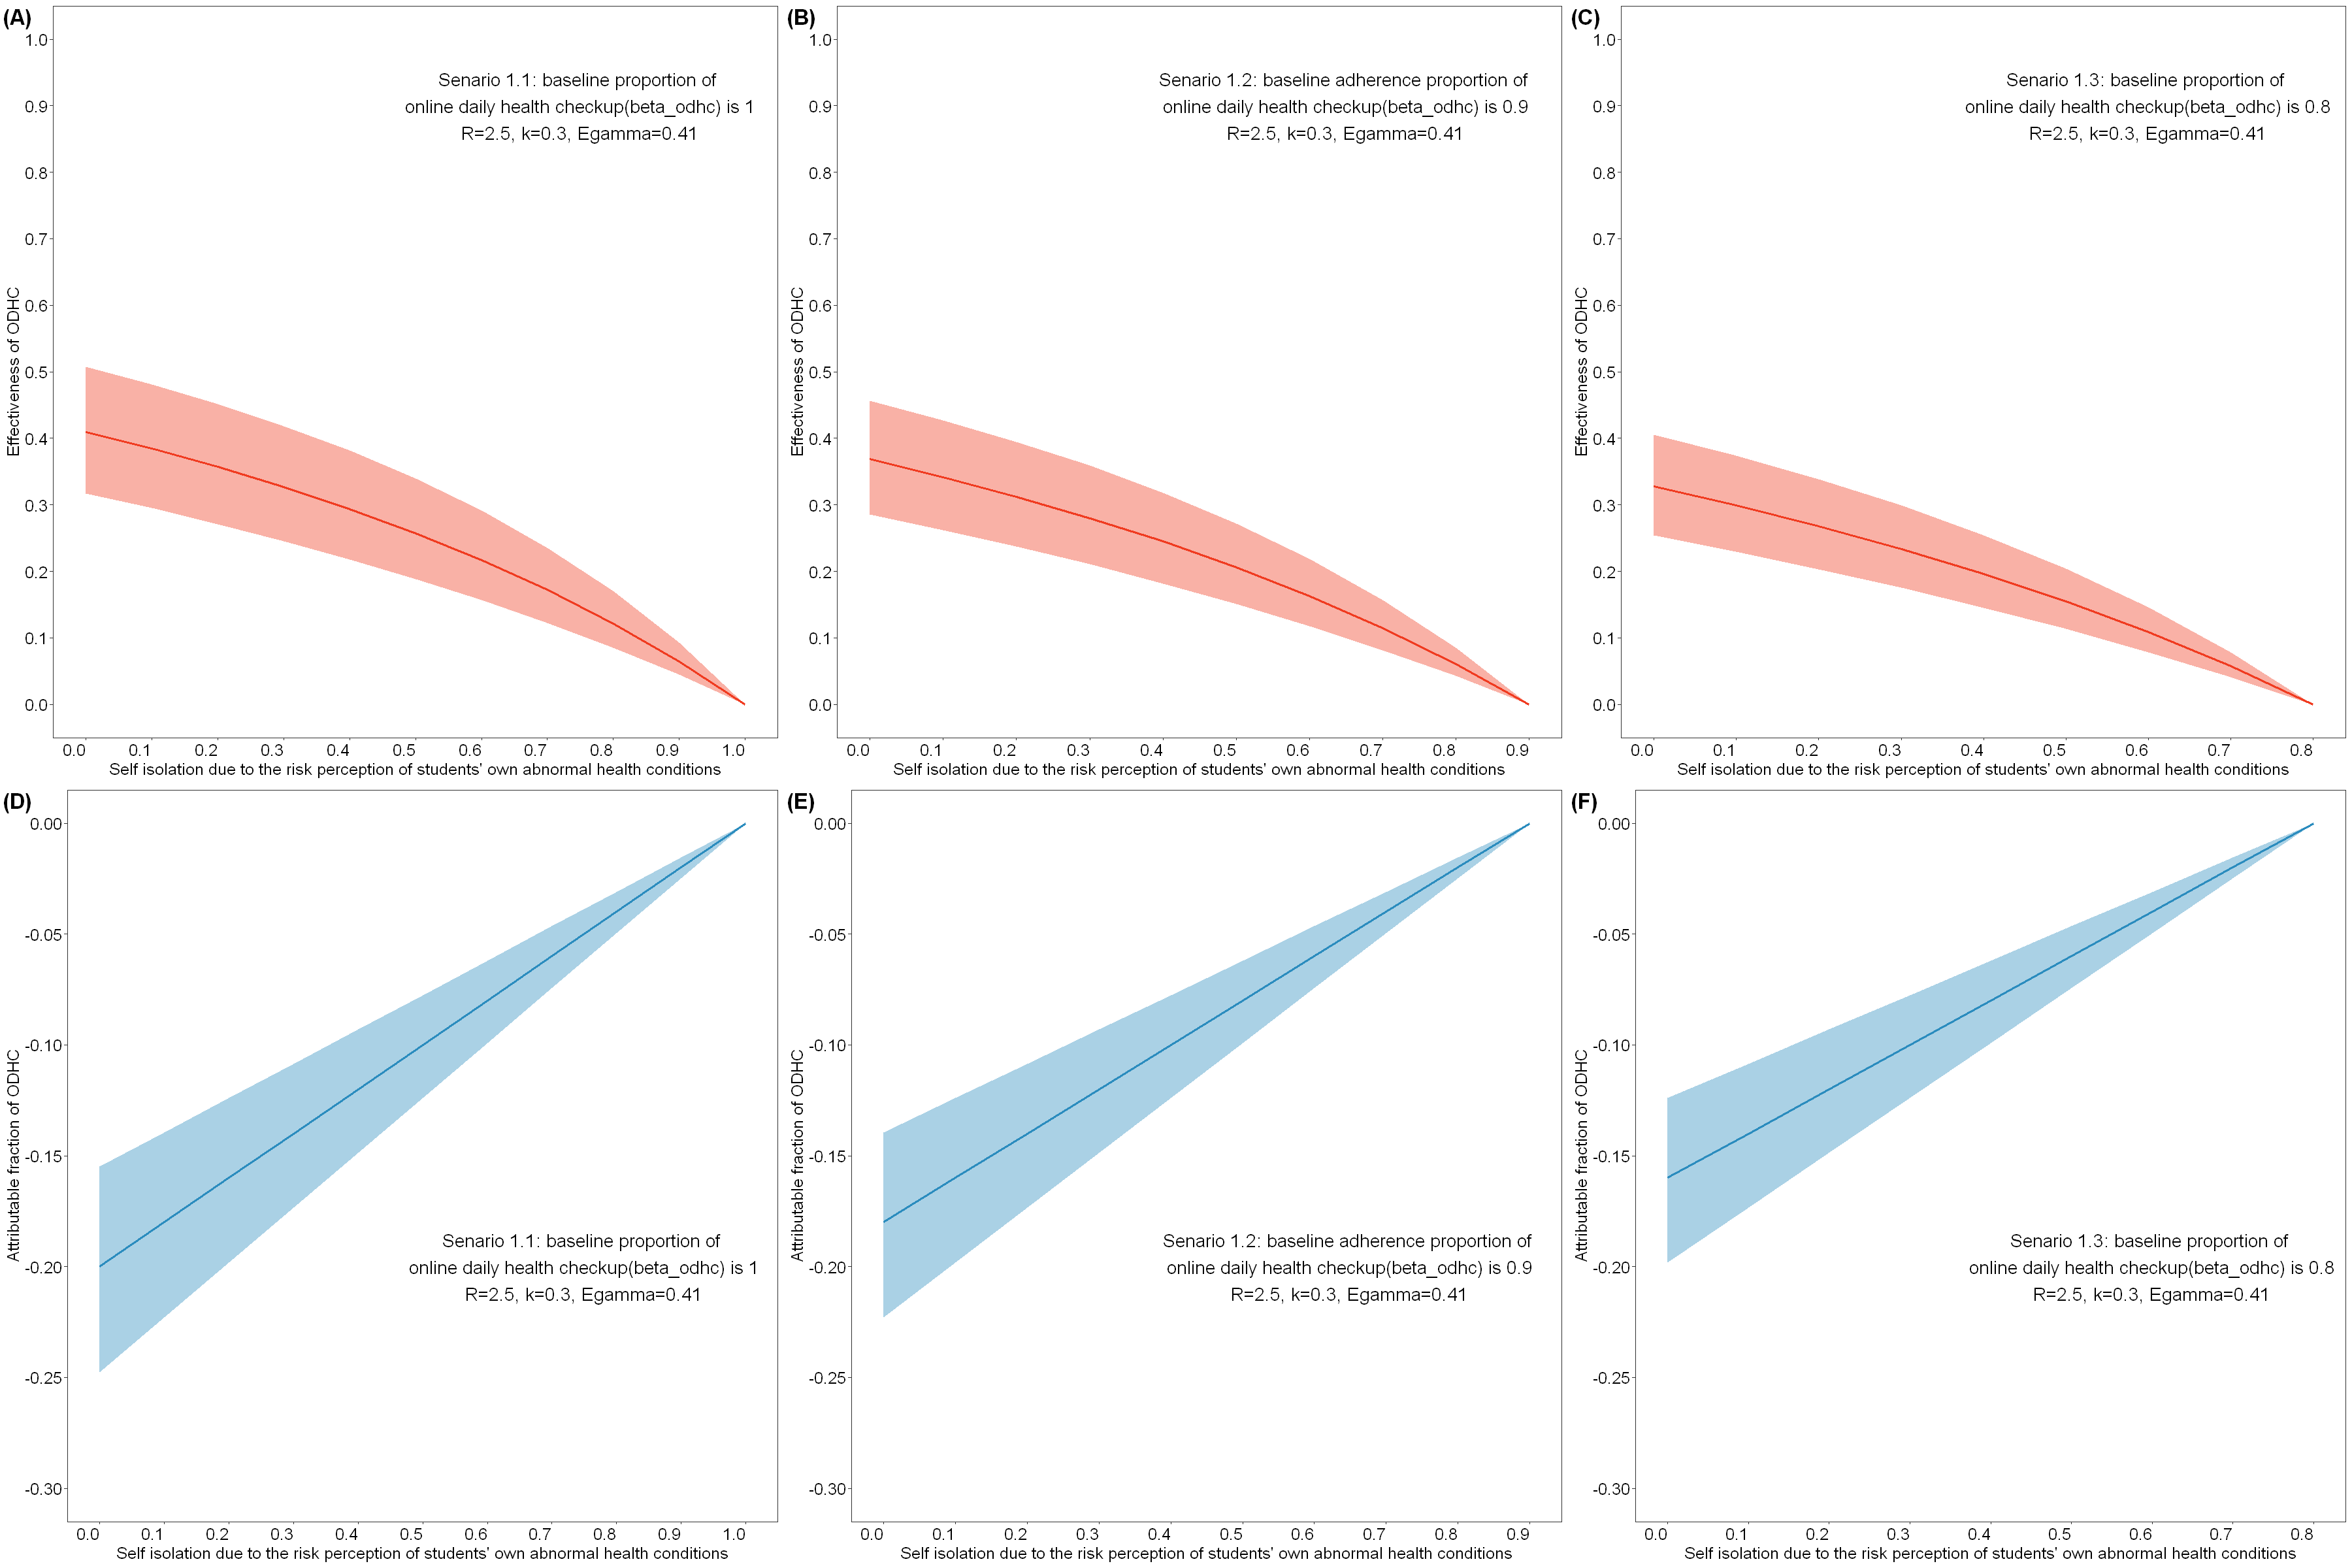

In [38]:
options(repr.plot.width=30,repr.plot.height=20)
ggarrange(de_s41_plot,de_s42_plot,de_s43_plot,ar_s41_plot,ar_s42_plot,ar_s43_plot, nrow=2,ncol=3,font.label=list(size=20),hjust=-0.1,labels=c("(A)","(B)","(C)","(D)","(E)","(F)"),common.legend=TRUE,legend="right")

ggsave(file = "output/baseline_4.png", width = 30, height = 20)

### Scenario 5: R=2.5, k=0.5

In [39]:
beta_odhc_s51 <- 1
beta_self <- seq(0,beta_odhc_s51,0.1)
de_s51 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s51 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s51[i,] <- de(R=2.5,k=0.5,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s51[i,] <- ar(R=2.5,k=0.5,beta_odhc=beta_odhc_s11,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s51 %<>% cbind(beta_self) %>% as.data.frame()
ar_s51 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s51) <- c("lower","median","upper","beta_self")
colnames(ar_s51) <- c("lower","median","upper","beta_self")

In [40]:
beta_odhc_s52 <- 0.9
beta_self <- seq(0,beta_odhc_s52,0.1)
de_s52 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s52 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s52[i,] <- de(R=2.5,k=0.5,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s52[i,] <- ar(R=2.5,k=0.5,beta_odhc=beta_odhc_s12,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s52 %<>% cbind(beta_self) %>% as.data.frame()
ar_s52 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s52) <- c("lower","median","upper","beta_self")
colnames(ar_s52) <- c("lower","median","upper","beta_self")

In [41]:
beta_odhc_s53 <- 0.8
beta_self <- seq(0,beta_odhc_s53,0.1)
de_s53 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
ar_s53 <- matrix(1:(3*length(beta_self)), length(beta_self),3)
for(i in 1:length(beta_self)){
    de_s53[i,] <- de(R=2.5,k=0.5,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
    ar_s53[i,] <- ar(R=2.5,k=0.5,beta_odhc=beta_odhc_s13,beta_self=beta_self[i],Egamma=0.41) %>% quantile(probs=c(.025,.50,.975))
}
de_s53 %<>% cbind(beta_self) %>% as.data.frame()
ar_s53 %<>% cbind(beta_self) %>% as.data.frame()
colnames(de_s53) <- c("lower","median","upper","beta_self")
colnames(ar_s53) <- c("lower","median","upper","beta_self")

### plot

In [42]:
de_s51_plot <- de_s51 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=0.9, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s51, 0.1), limits=c(0,beta_odhc_s51)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s52_plot <- de_s52 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=0.9, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s52, 0.1), limits=c(0,beta_odhc_s52)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

de_s53_plot <- de_s53 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#f03b20", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#f03b20", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Effectiveness of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=0.9, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s53, 0.1), limits=c(0,beta_odhc_s53)) +
  scale_y_continuous(breaks = seq(0, 1, 0.1), limits=c(0, 1)) 

In [43]:
ar_s51_plot <- ar_s51 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.75, y=-0.2, size=6, label="Senario 1.1: baseline proportion of 
online daily health checkup(beta_odhc) is 1
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s51, 0.1), limits=c(0,beta_odhc_s51)) +
  scale_y_continuous(breaks = seq(-0.4, 0, 0.05), limits=c(-0.4, 0)) 

ar_s52_plot <- ar_s52 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.65, y=-0.2, size=6, label="Senario 1.2: baseline adherence proportion of 
online daily health checkup(beta_odhc) is 0.9
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s52, 0.1), limits=c(0,beta_odhc_s52)) +
  scale_y_continuous(breaks = seq(-0.4, 0, 0.05), limits=c(-0.4, 0)) 

ar_s53_plot <- ar_s53 %>% ggplot() +
  geom_ribbon(aes(x = beta_self, ymin = lower, ymax = upper), fill = "#2b8cbe", alpha = 0.4) +
  geom_line(aes(x = beta_self, y = median), color="#2b8cbe", size = 1, alpha=1) +
  labs(x="Self isolation due to the risk perception of students' own abnormal health conditions",y="Attributable fraction of ODHC") +
  theme_bw() + annotate("text", x=0.6, y=-0.2, size=6, label="Senario 1.3: baseline proportion of 
online daily health checkup(beta_odhc) is 0.8
R=2.5, k=0.5, Egamma=0.41") +
  theme(axis.text.x = element_text(size=15, angle = 0, hjust = 1),axis.text.y = element_text(size=15),
          text = element_text(size=15, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         legend.position = "right",
    legend.justification = c(1, 1),
    legend.background = element_rect(fill = "white", colour = "black")) + scale_x_continuous(breaks = seq(0, beta_odhc_s53, 0.1), limits=c(0,beta_odhc_s53)) +
  scale_y_continuous(breaks = seq(-0.4, 0, 0.05), limits=c(-0.4, 0)) 

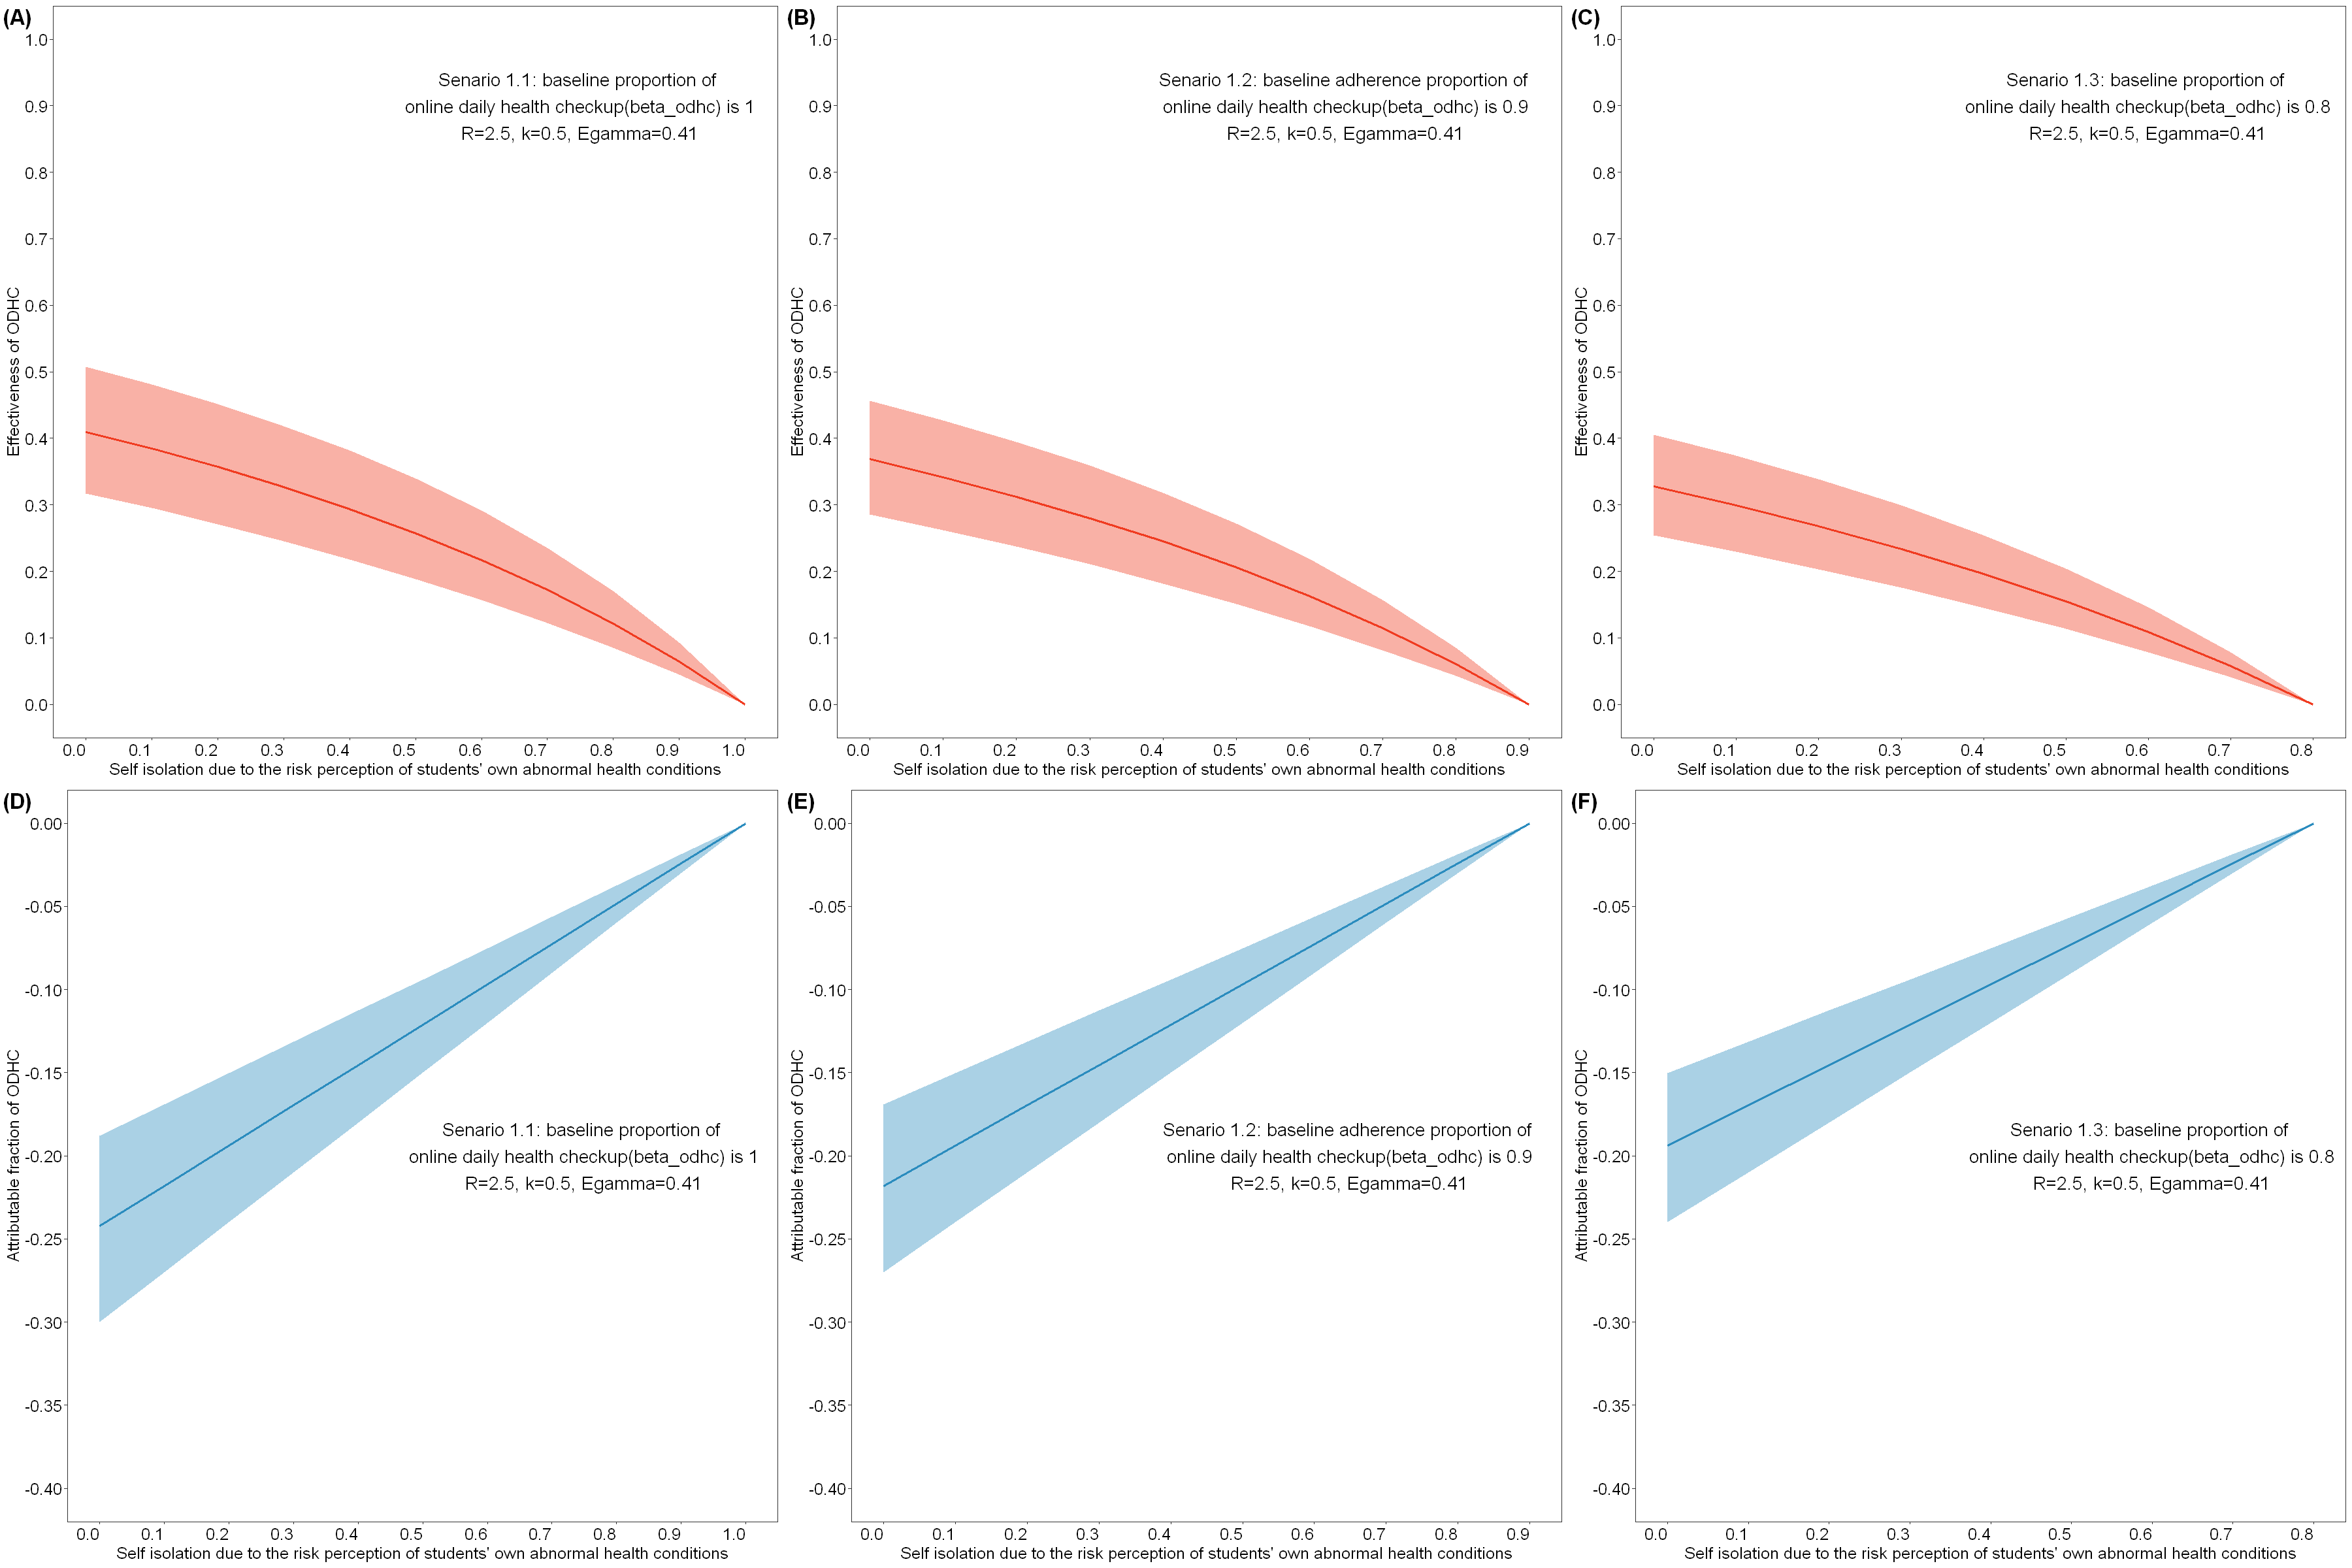

In [44]:
options(repr.plot.width=30,repr.plot.height=20)
ggarrange(de_s51_plot,de_s52_plot,de_s53_plot,ar_s51_plot,ar_s52_plot,ar_s53_plot, nrow=2,ncol=3,font.label=list(size=20),hjust=-0.1,labels=c("(A)","(B)","(C)","(D)","(E)","(F)"),common.legend=TRUE,legend="right")

ggsave(file = "output/baseline_5.png", width = 30, height = 20)